## Задание 1.

Посчитайте частоты для 5-грамм в корпусе lenta.txt. двумя способами:  
1) lenta.txt -> sent_tokenize (russian) -> word_tokenize -> ngrammer  
2) lenta.txt -> word_tokene(preserve_line=True) - ngrammer  
    
Проанализируйте топ-20 самых частотных нграмм и проверьте есть ли различия? 

In [1]:
!mkdir data
!wget https://github.com/mannefedov/compling_nlp_hse_course/raw/master/data/lenta.txt.zip -P data
!unzip -o data/lenta.txt.zip -d data/

mkdir: data: File exists
--2023-10-02 15:42:21--  https://github.com/mannefedov/compling_nlp_hse_course/raw/master/data/lenta.txt.zip
Распознаётся github.com (github.com)… 140.82.121.4
Подключение к github.com (github.com)|140.82.121.4|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 302 Found
Адрес: https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/master/data/lenta.txt.zip [переход]
--2023-10-02 15:42:22--  https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/master/data/lenta.txt.zip
Распознаётся raw.githubusercontent.com (raw.githubusercontent.com)… 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Подключение к raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 5723675 (5.5M) [application/zip]
Сохранение в: «data/lenta.txt.zip.1»

lenta.txt.zip.1     100%[===================>]   5.46M  2.90MB/s    за 1.9s    

2023-

In [2]:
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
import re
from collections import Counter

In [3]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ignatenkodarja/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
corpus = open('data/lenta.txt').read()
sentences = sent_tokenize(corpus, language='russian')

tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]
tokenized_sentences = [[token.lower() for token in sentence if not re.match('\W+', token)] 
                       for sentence in tokenized_sentences]

In [5]:
nltk.download('stopwords')
from nltk.corpus import stopwords

russian_stopwords = set(stopwords.words('russian'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ignatenkodarja/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
def ngrammer(tokens, n=2):
    ngrams = []
    for i in range(len(tokens)-n+1):
        ngrams.append(' '.join(tokens[i:i+n]))
    return ngrams

bigram_counts = Counter()
for sentence in tokenized_sentences:
    bigram_counts.update(ngrammer([token for token in sentence if token not in russian_stopwords]))

In [7]:
bigram_counts.most_common(20)

[('риа новости', 3501),
 ('сообщает риа', 1325),
 ('настоящее время', 769),
 ('миллионов долларов', 679),
 ('2000 года', 571),
 ('передает риа', 568),
 ('1999 года', 544),
 ('владимир путин', 519),
 ('федеральных сил', 492),
 ('эхо москвы', 488),
 ('таким образом', 483),
 ('президента россии', 476),
 ('северном кавказе', 474),
 ('внутренних дел', 456),
 ('сообщает интерфакс', 422),
 ('новости ссылкой', 408),
 ('сообщает агентство', 343),
 ('ближайшее время', 339),
 ('сообщили риа', 332),
 ('сих пор', 330)]

In [8]:
tokenized = word_tokenize(corpus, language='russian', preserve_line=True)
tokenized = [token.lower() for token in tokenized if not re.match('\W+', token)]

In [9]:
bigram_counts_2 = Counter()
bigram_counts_2.update(ngrammer([token for token in tokenized if token not in russian_stopwords]))

In [10]:
bigram_counts_2.most_common(20)

[('риа новости', 3496),
 ('сообщает риа', 1325),
 ('настоящее время', 766),
 ('передает риа', 567),
 ('эхо москвы', 488),
 ('таким образом', 483),
 ('владимир путин', 446),
 ('1999 года', 439),
 ('внутренних дел', 424),
 ('федеральных сил', 420),
 ('сообщает интерфакс', 419),
 ('президента россии', 417),
 ('новости ссылкой', 408),
 ('миллионов долларов', 405),
 ('2000 года', 399),
 ('северном кавказе', 337),
 ('сообщает агентство', 337),
 ('сообщили риа', 332),
 ('сих пор', 320),
 ('ближайшее время', 313)]

## Задание 2.

Найдите какую-то инетересную (по вашему мнению) закономерность на https://books.google.com/ngrams/ для русского языка (с 1990 по 2019)

Вставьте сюда скриншот

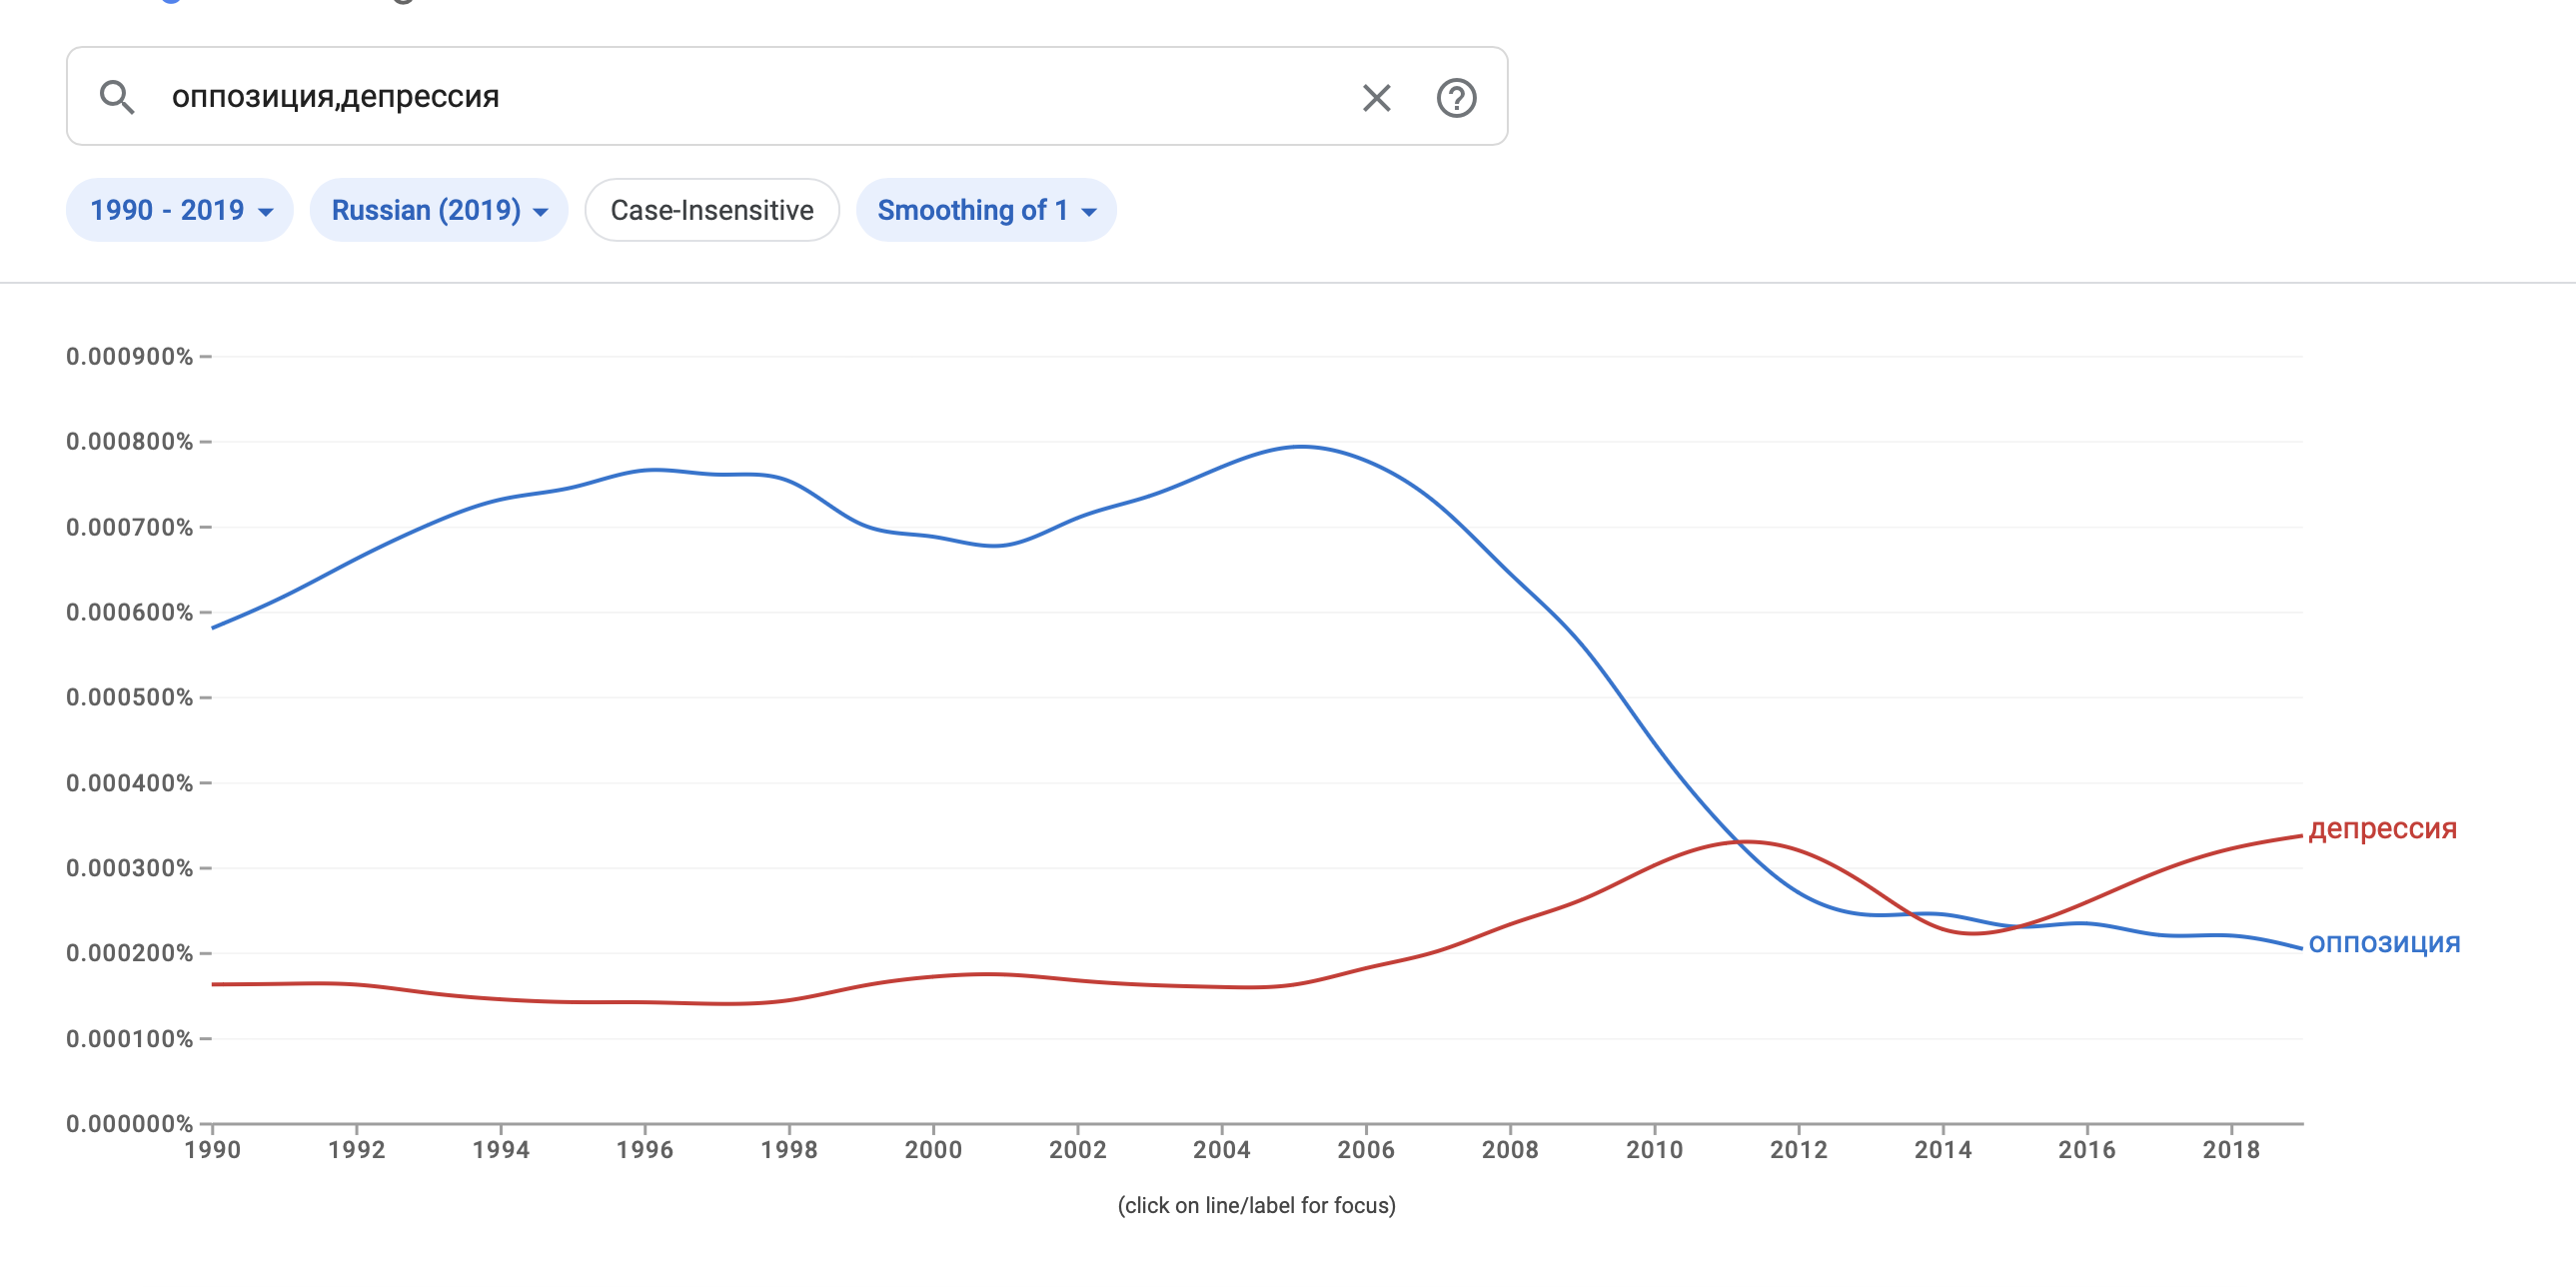


## Заданиe 3

Когда мы разбирали PMI мы использовали такую функцию:

In [11]:
def scorer_simple(word_count_a, word_count_b, bigram_count, *args):
    try:
        score = bigram_count/((word_count_a+word_count_b))
    except ZeroDivisionError:
        return 0
    return score

Но если вы посмотрите на определение в википедии, то увидите, что формула немного другая ![](https://wikimedia.org/api/rest_v1/media/math/render/svg/094243d23c19d2d032f6bb26c4dc4f47d98d32f8)

Перепишите функцию, чтобы она точно соответствовала этому определению. Расчитайте PMI для всех биграммов также как мы делали в семинаре с помощью функции score_bigrams используя изначальный scorer и обновленный. Посмотрите есть ли разница в топ-10 биграммов. Подумайте почему результаты совпадают/отличаются?

*Подсказка: для вероятностей можно поделить на количество слов в корпусе

In [12]:
import math

In [30]:
def scorer(word_count_a, word_count_b, bigram_count, min_count=0):
    try:
        score = ((bigram_count - min_count) / ((word_count_a + word_count_b)))
    except ZeroDivisionError:
        return 0
    
    return score

# добавим параметр min_count
def score_bigrams(unigrams, bigrams, scorer, threshold=-100000, min_count=0):
    ## посчитаем метрику для каждого нграмма
    bigram2score = Counter()
    
    for bigram in bigrams:
        word_a, word_b = bigram.split()
        score = scorer(unigrams[word_a], unigrams[word_b], bigrams[bigram], min_count)
        
        ## если метрика выше порога, добавляем в словарик
        if score > threshold:
            bigram2score[bigram] = score
    
    return bigram2score

def collect_stats(corpus, stops):
    ## соберем статистики для отдельных слов
    ## и биграммов
    
    unigrams = Counter()
    bigrams = Counter()
    
    for sent in corpus:
        unigrams.update(sent)
        bigrams.update(ngrammer(sent, 2, stops))
    
    return unigrams, bigrams

In [31]:
unigrams, bigrams = collect_stats(tokenized_sentences, russian_stopwords)

In [32]:
bigram2score_old = score_bigrams(unigrams, bigrams, scorer, min_count=20)

In [33]:
bigram2score_old.most_common(15)

[('риа новости', 0.4900746163592848),
 ('северном кавказе', 0.44553483807654565),
 ('associated press', 0.4345991561181435),
 ('new york', 0.4218009478672986),
 ('сих пор', 0.39092055485498106),
 ('взрывное устройство', 0.3665768194070081),
 ('таким образом', 0.3657187993680885),
 ('рао еэс', 0.33954451345755693),
 ('доменных имен', 0.31512605042016806),
 ('чрезвычайным ситуациям', 0.30935251798561153),
 ('налогам сборам', 0.30201342281879195),
 ('wall street', 0.3018867924528302),
 ('населенного пункта', 0.3013698630136986),
 ('объединенной группировки', 0.2993421052631579),
 ('возбуждено уголовное', 0.2983606557377049)]

In [36]:
def scorer_simple_wiki(word_count_a, word_count_b, bigram_count, words_count, bigrams_count, min_count=0, *args):
    try:
        prob_a = word_count_a / words_count
        prob_b = word_count_b / words_count
        prob_bigram = bigram_count / bigrams_count
        #min_count = min_count / bigrams_count
        #score = math.log((prob_bigram - min_count)/ (prob_a * prob_b), 2)
        score = math.log(prob_bigram/ (prob_a * prob_b), 2)
    except ZeroDivisionError:
        return 0
    return score

def ngrammer(tokens, n=2, stops=set()):
    ngrams = []
    tokens = [token for token in tokens if token not in stops]
    for i in range(0,len(tokens)-n+1):
        ngrams.append(' '.join(tokens[i:i+n]))
    return ngrams

In [37]:


def score_bigrams(unigrams, bigrams, scorer, threshold=-100000, min_count=0):
    ## посчитаем метрику для каждого нграмма
    bigram2score = Counter()
    words_count = sum(unigrams.values())
    bigrams_count = sum(bigrams.values())
    for bigram in bigrams:
        word_a, word_b = bigram.split()
        score = scorer(unigrams[word_a], unigrams[word_b], 
                       bigrams[bigram], words_count, bigrams_count, min_count)
        
        ## если метрика выше порога, добавляем в словарик
        if score > threshold:
            bigram2score[bigram] = score
    
    return bigram2score

In [23]:
unigrams, bigrams = collect_stats(tokenized_sentences, russian_stopwords)

In [24]:
#pmi по формуле из википедии
bigram2score = score_bigrams(unigrams, bigrams, scorer_simple_wiki, min_count=20)

In [25]:
bigram2score.most_common(15)

[('сопоцкина друскеник', 21.016128566820324),
 ('неприятель приблизившись', 21.016128566820324),
 ('саноку обстреливалась', 21.016128566820324),
 ('м.ю лермонтова', 21.016128566820324),
 ('австрийский аэроплан', 21.016128566820324),
 ('показывался аэроплан-птица', 21.016128566820324),
 ('das ist', 21.016128566820324),
 ('ist nesteroff', 21.016128566820324),
 ('песнь нестерове', 21.016128566820324),
 ('могучий унесся', 21.016128566820324),
 ('шумели лязгали', 21.016128566820324),
 ('зловеще гремели.и', 21.016128566820324),
 ('гремели.и пламенно', 21.016128566820324),
 ('жаждали битвы…величие', 21.016128566820324),
 ('равнине обманчиво-зыбкой.презрение', 21.016128566820324)]

In [26]:
bigram2score.most_common()[-15:-1]

[('также россии', -2.3906192024500146),
 ('новости время', -2.4213878261276616),
 ('это новости', -2.468429093092815),
 ('это года', -2.4748517861307167),
 ('словам также', -2.5280745246984364),
 ('года риа', -2.5785835187112602),
 ('заявил сообщает', -2.67006458961577),
 ('однако россии', -2.7174104377209334),
 ('это сообщает', -2.8248620369368065),
 ('сообщает это', -2.8248620369368065),
 ('россии словам', -2.9411692379274568),
 ('также также', -2.9775244892209947),
 ('россии время', -3.0231492945089657),
 ('россии новости', -3.2019524472977303)]

In [27]:
#старая формула из ноутбука с семика
bigram2score_2 = score_bigrams(unigrams, bigrams, scorer_simple)

In [28]:
bigram2score_2.most_common(15)

[('сопоцкина друскеник', 0.5),
 ('неприятель приблизившись', 0.5),
 ('саноку обстреливалась', 0.5),
 ('м.ю лермонтова', 0.5),
 ('австрийский аэроплан', 0.5),
 ('показывался аэроплан-птица', 0.5),
 ('das ist', 0.5),
 ('ist nesteroff', 0.5),
 ('песнь нестерове', 0.5),
 ('могучий унесся', 0.5),
 ('шумели лязгали', 0.5),
 ('зловеще гремели.и', 0.5),
 ('гремели.и пламенно', 0.5),
 ('жаждали битвы…величие', 0.5),
 ('равнине обманчиво-зыбкой.презрение', 0.5)]

In [29]:
bigram2score_2.most_common()[-15:-1]

[('словам также', 0.00014124293785310735),
 ('года риа', 0.00014046916701783958),
 ('россии около', 0.0001384083044982699),
 ('тысяч россии', 0.0001374003847210772),
 ('будут россии', 0.00013666803334700013),
 ('которые россии', 0.0001350438892640108),
 ('заявил сообщает', 0.0001327844907714779),
 ('это сообщает', 0.0001271617497456765),
 ('сообщает это', 0.0001271617497456765),
 ('однако россии', 0.00012492192379762648),
 ('также также', 0.00012233912405187178),
 ('россии словам', 0.00011855364552459988),
 ('россии время', 0.00011614401858304297),
 ('россии новости', 0.00011076650420912716)]

## Задание 4*

Обновите функцию получившуюся в предыдущем задании так, чтобы вместо произведения/деления вероятностей использовались сложение и вычитание логирифмов. 

In [38]:
def scorer_simple_log(word_count_a, word_count_b, bigram_count, words_count, bigrams_count, *args):
    try:
        prob_a = word_count_a / words_count
        prob_b = word_count_b / words_count
        prob_bigram = bigram_count / bigrams_count
        score = math.log(prob_bigram, 2) - (math.log(prob_a, 2) + math.log(prob_b, 2))
    except ZeroDivisionError:
        return 0
    return score

In [39]:
bigram2score_log = score_bigrams(unigrams, bigrams, scorer_simple_ln)

In [40]:
bigram2score_log.most_common(15)

[('сопоцкина друскеник', 21.016128566820324),
 ('неприятель приблизившись', 21.016128566820324),
 ('саноку обстреливалась', 21.016128566820324),
 ('м.ю лермонтова', 21.016128566820324),
 ('австрийский аэроплан', 21.016128566820324),
 ('показывался аэроплан-птица', 21.016128566820324),
 ('das ist', 21.016128566820324),
 ('ist nesteroff', 21.016128566820324),
 ('песнь нестерове', 21.016128566820324),
 ('могучий унесся', 21.016128566820324),
 ('шумели лязгали', 21.016128566820324),
 ('зловеще гремели.и', 21.016128566820324),
 ('гремели.и пламенно', 21.016128566820324),
 ('жаждали битвы…величие', 21.016128566820324),
 ('равнине обманчиво-зыбкой.презрение', 21.016128566820324)]

## Задание 5

Исследуйте gensim.models.Phrases. Проверьте сколько дефолтных scoring функций есть в этом классе. Попробуйте все доступные по умолчанию scoring функции и попробуйте настраивать для них значение threshold и min_count. Попробуйте сделать так, чтобы собиралось как можно больше нграммов. Попробуйте строить последовательность gensim.models.Phrases, чтобы строить более длинные нграммы

In [41]:
import gensim

In [63]:
"""Specify how potential phrases are scored. scoring can be set with either a string that refers to a built-in scoring function, or with a function with the expected parameter names. Two built-in scoring functions are available by setting scoring to a string:

”default” - original_scorer().

”npmi” - npmi_scorer()."""
ph = gensim.models.Phrases(tokenized_sentences, 
                           min_count=1, 
                           threshold=1.,
                           scoring="npmi")

In [64]:
p = gensim.models.phrases.Phraser(ph)

In [65]:
print(p)


FrozenPhrases<40 phrases, min_count=1, threshold=1.0>


In [49]:
ph2 = gensim.models.Phrases(p[tokenized_sentences],  min_count=1, threshold=1., scoring="npmi")
p2 = gensim.models.phrases.Phraser(ph2)

In [54]:
tokenized_sentences[1]

['неприятель',
 'приблизившись',
 'с',
 'севера',
 'к',
 'осовцу',
 'начал',
 'артиллерийскую',
 'борьбу',
 'с',
 'крепостью']

In [69]:
from gensim.test.utils import datapath
from gensim.models.word2vec import Text8Corpus
from gensim.models.phrases import Phrases, Phraser

phrases = Phrases(tokenized_sentences, min_count=1, threshold=1, scoring="npmi")

bigram = Phraser(phrases)



In [72]:
bigram